In [13]:
import pandas as pd
# the metadata for this tutorial can be found on two csv files, metadata.csv and meta_cluster.csv
# these lines of code load and concatenate the two source files
df = pd.read_csv("metadata.csv")
df_cluster = pd.read_csv("meta_cluster.csv", dtype={'cluster_id': str})

# pd.concat() allows us concatenate the csvs using rules or logic
# in this case, axis= 0 means to join by rows instead of the columns, to sort the results, and to fill nan values with 0
# the last part is important because meta_cluster.csv has a column for cluster_id and metadata.csv does not
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
df_all = pd.concat([df,df_cluster], axis=0, ignore_index=True, sort=True).fillna('none')
df_all

,cluster_id,day,month,nyt_id,nyt_pdf_endpoint,perceived_author_gender,xml_id,year
0,none,7,1,4fc03b9245c1498b0d1e86aa,https://timesmachine.nytimes.com/timesmachine/...,none,101702107,1905
1,none,7,1,4fc0532945c1498b0d250e4c,https://timesmachine.nytimes.com/timesmachine/...,m,101702142,1905
2,none,7,1,4fc045fc45c1498b0d2162b6,https://timesmachine.nytimes.com/timesmachine/...,m,101702170,1905
3,none,7,1,4fc0532945c1498b0d250e51,https://timesmachine.nytimes.com/timesmachine/...,none,101702169,1905
4,none,7,1,4fc03b9245c1498b0d1e86ad,https://timesmachine.nytimes.com/timesmachine/...,m,101702168,1905
...,...,...,...,...,...,...,...,...
3213,3,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,none,113314527,1920
3214,4,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,m,113314527,1920
3215,5,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,m,113314527,1920
3216,6,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,m,113314527,1920


In [14]:
# creating separate dataframes for all binary values and all non_binary values  
df_non_binary = df_all.query("perceived_author_gender == 'none' or perceived_author_gender == 'dual'").reset_index(drop=True)
df_binary = df_all.query("perceived_author_gender == 'm' or perceived_author_gender == 'f'").reset_index(drop=True)

In [15]:
# load term frequencies from csv files, convert to list of dictionaries
# loop metadata 
list_of_dictionaries_binary = []
for row in df_binary.iterrows():
    if row[1]['cluster_id'] == 'none':
        # if there's no numerican cluster id, build the file name using only the folder location, the id, and '.csv'
        # note that this code may need to be edited for windows machines
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '.csv'])
    else:
        # if there's a numerican cluster id, build the file name with the folder location, the id, a hyphen, the cluster_id, and '.csv' number
        # note that this code may need to be edited for windows machines
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '-', 

        row[1]['cluster_id'], '.csv'])

    # loading a csv as a pandas dataframe is often the fastest way to get data into python
    df = pd.read_csv(txt_file_name).dropna().reset_index(drop=True)

    # but I want a dictionary that looks like this:
    # mydict = {'the': 20,'of': 9,'and': 8,'poems': 6 ... }
    # this is a format scikit learn is designed to read
    mydict = dict(zip(list(df['term']), list(df['count'])))

    # list() turns each column to a list, zip() takes the two lists and makes a list of tuples, like this:
    # [('the', 20),('of', 9),('and', 8),('poems', 6) ... ]
    # and dict() converts that list of tuples to a dictionary

    # finally, now that I have the right format, I add this dictionary to end of my list of dictionaries
    list_of_dictionaries_binary.append(mydict)

# len() of list_of_dictionaries will be the same as the number of reviews in binary, and the ame order
len(list_of_dictionaries_binary)

2888

In [37]:
# import various from scikit learn
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# set up logistic regression with gender labels
v_binary = DictVectorizer()

# make 'true' labels
y_binary = list(df_binary['perceived_author_gender'])
y_binary

['m',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'f',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'f',
 'f',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'f',
 'm',
 'm',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'm',
 'm',
 'f',
 'm',
 'm',
 'f',
 'f',
 'f'

In [38]:
# convert to 0s and 1s so scikit learn can score them
y_binary = [0 if i == 'f' else 1 for i in y_binary]
y_binary

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [28]:
from collections import Counter 

def top_words(number, list_of_dicts):
    totals = {}
    for d in list_of_dicts:
        for k,v, in d.items():
            try:
                totals[k] += v
            except: 
                totals[k] = v
    totals = Counter(totals)
    return [i[0] for i in totals.most_common(number)]

def cull_list_of_dicts(term_list, list_of_dicts):
    results = []
    for d in list_of_dicts:
        result = {}
        for term in term_list:
            try:
                result[term] = d[term]
            except:
                pass 
        results.append(result)
    return results

top_term_list_binary = top_words(10000, list_of_dictionaries_binary)
new_list_of_dicts_binary = cull_list_of_dicts(top_term_list_binary, list_of_dictionaries_binary)
len(new_list_of_dicts_binary)

2888

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

X_binary = v.fit_transform(new_list_of_dicts_binary)
tfidf_binary = TfidfTransformer()
Z_binary = tfidf.fit_transform(X_binary)

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
Z_new_binary = SelectKBest(f_classif, k=3500).fit_transform(Z_binary, y_binary)
Z_new_binary

<2888x3500 sparse matrix of type '<class 'numpy.float64'>'
	with 551568 stored elements in Compressed Sparse Row format>

In [44]:
# split the rows into training data, training labels, test data, and test labels
# test on 33% of the data
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(Z_new_binary, y_binary, test_size=0.33, random_state=11)

In [46]:
# weight the model to expect labels that are 72% 0 and 28% 1
lr = LogisticRegression(class_weight={0:0.72, 1:0.28})

# fit the model to the training data
lr.fit(X_train_binary, y_train_binary)

# make label predictions
results = lr.predict(X_test_binary)

# generate probabilities for each label
probs = lr.predict_proba(X_test_binary)

In [47]:
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [7]:
from collections import Counter
she_scores = []
for i in list_of_dictionaries:
    score = float(Counter(i)['she'])/sum(i.values())
    she_scores.append(score)

In [8]:
import pandas as pd
she_scores_df = pd.DataFrame()
she_scores_df['score'] = she_scores
she_scores_df['gender'] = y
bins = [-0.01,0.01,0.02,0.03]
she_scores_df['group'] = pd.cut(she_scores_df['score'], bins=bins)
she_scores_df_grouped = she_scores_df.groupby(['group','gender']).count().reset_index().set_index('group')



df_final = pd.DataFrame()
df_final['frequency_range'] = ["0-0.01", "0.01-0.02", "0.02-0.03"]
df_final['labeled_female'] = list(she_scores_df_grouped.loc[she_scores_df_grouped['gender'] == 0]['score'])
df_final['labeled_male'] = list(she_scores_df_grouped.loc[she_scores_df_grouped['gender'] == 1]['score'])
df_final = df_final.set_index('frequency_range')
df_final

,labeled_female,labeled_male
frequency_range,,
0-0.01,503,2106
0.01-0.02,166,57
0.02-0.03,43,9


<AxesSubplot:xlabel='frequency_range'>

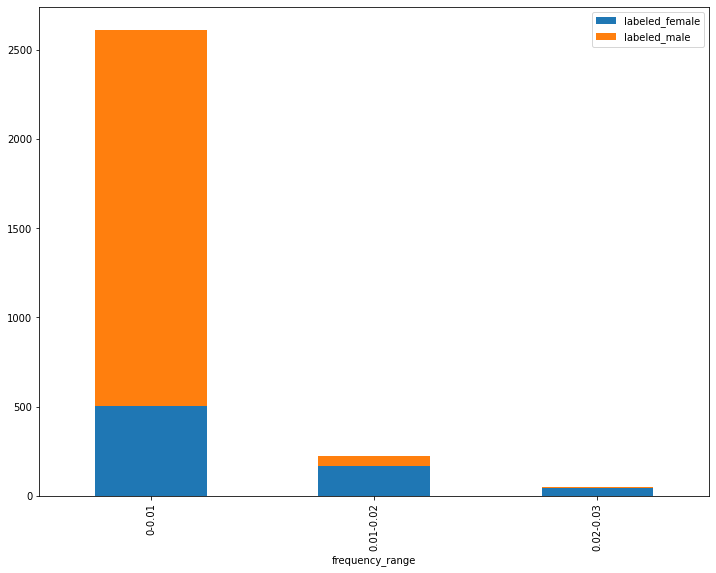

In [9]:
%matplotlib inline
df_final.plot(kind='bar', stacked=True, figsize=(12,9))

In [10]:
# make averages 
# make labels
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
df

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


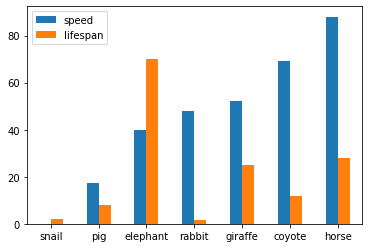

In [11]:
ax = df.plot.bar(rot=0)

In [12]:
freq = []
words_by_year = {}

for e,i in enumerate(list_of_dictionaries):
    try:
        s = sum(i.values()) 
    except:
        s = 0
    freq.append(s)
    try:
        words_by_year[years[e]].append(s)
    except:
        words_by_year[years[e]] = [s,]
    

NameError: name 'years' is not defined

In [50]:
years_matched = []
avgs = []
for i,j in words_by_year.items():
    avg = sum(j)/len(j)
    avgs.append(avg)
    years_matched.append(i)

NameError: name 'years_matched' is not defined

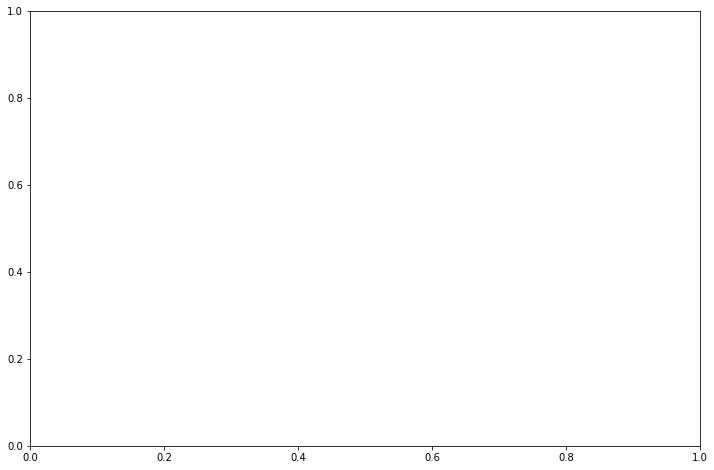

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
predicted = [-66061.00106780072 + (i*35.005421627728694) for i in years_matched]


for e,i in enumerate(years_matched):
    year = i
    p = (predicted[e]-420)/1125
    a = (avgs[e]-420)/1125
    if p > a:
        ax.axvline(i, p, a, color='black')
    else:
        ax.axvline(i, a, p, color='red')
sns.regplot(ax=ax, x=years_matched, y=avgs)


In [90]:
from scipy.stats import linregress
linregress(years_matched, avgs)


LinregressResult(slope=35.005421627728694, intercept=-66061.00106780072, rvalue=0.766545056248215, pvalue=5.0626020082304004e-05, stderr=6.727980473829263)

In [100]:
predicted = [-66061.00106780072 + (i*35.005421627728694) for i in years_matched]
avg_residual = sum([abs(i-avgs[e]) for e,i in enumerate(predicted)])/len(predicted)
avg_residual

146.24705232712066

85.76409527667208

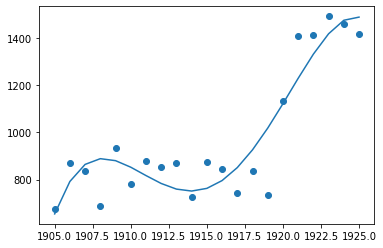

In [96]:
import numpy
import numpy.polynomial.polynomial as poly

# 4 is the degree of the fitting polynomial
coefs = poly.polyfit(years_matched, avgs, 4)
ffit = poly.polyval(years_matched, coefs)
plt.plot(years_matched, ffit)
plt.scatter(years_matched, avgs)
sum(abs(ffit - avgs))/len(avgs)


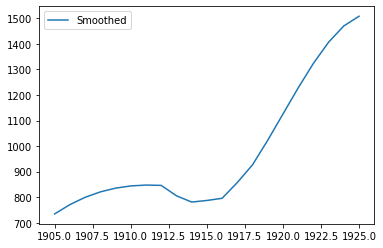

In [73]:
from scipy.signal import savgol_filter
y_smooth = savgol_filter(avgs, 15, 3) # window size 51, polynomial order 3

#years_matched
#avgs

#plt.plot(years_matched, avgs, label='Original')
plt.plot(years_matched, y_smooth, label='Smoothed')
plt.legend(loc=0)
plt.show()

<AxesSubplot:>

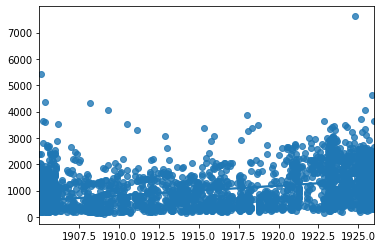

In [51]:
sns.regplot(x=date_labels, y=freq)

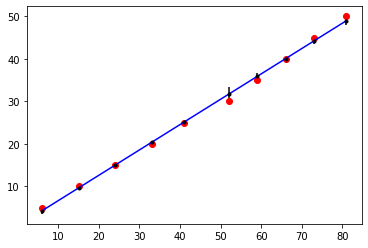

In [129]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([6, 15, 24, 33, 41, 52, 59, 66, 73, 81])
y = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients
plt.plot(x, y, 'ro', x, poly1d_fn(x), '-b')
plt.errorbar(x, poly1d_fn(x), yerr=poly1d_fn(x) - y, fmt='.k')
plt.show()